In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
npr.rand(10)

array([ 0.87945308,  0.42075884,  0.36497709,  0.26088938,  0.6828782 ,
        0.86755332,  0.18700104,  0.37934902,  0.08406644,  0.795329  ])

In [3]:
npr.rand(5, 5)

array([[ 0.21517638,  0.21377928,  0.12342605,  0.02949605,  0.83664953],
       [ 0.03803637,  0.60571549,  0.63796726,  0.56707253,  0.27469668],
       [ 0.02544037,  0.91591965,  0.31238736,  0.25435804,  0.9349901 ],
       [ 0.2547326 ,  0.08490505,  0.62379925,  0.84140242,  0.36113659],
       [ 0.54678664,  0.49126739,  0.47762149,  0.60765936,  0.29776243]])

In [4]:
a = 5.
b = 10.
npr.rand(10) * (b - a) + a

array([ 5.31535839,  6.33921267,  6.36542428,  9.33817154,  6.22559093,
        8.33691425,  8.30249291,  7.00339706,  5.31688246,  6.24586342])

In [5]:
npr.rand(5, 5) * (b - a) + a

array([[ 9.9343492 ,  9.76872403,  7.9776828 ,  6.99861626,  9.5537243 ],
       [ 6.14999734,  7.25571859,  9.10363188,  7.23582183,  6.40454748],
       [ 7.40577378,  9.12733202,  9.95318611,  7.31048673,  7.26484282],
       [ 9.92016094,  9.38301829,  9.24813829,  6.28961104,  6.70592596],
       [ 5.56458882,  6.2883485 ,  8.23948474,  7.91033879,  6.85331138]])

In [6]:
sample_size = 500
rn1 = npr.rand(sample_size, 3)
rn2 = npr.randint(0, 10, sample_size)
rn3 = npr.sample(size=sample_size)
a = [0, 25, 50, 75, 100]
rn4 = npr.choice(a, size=sample_size)

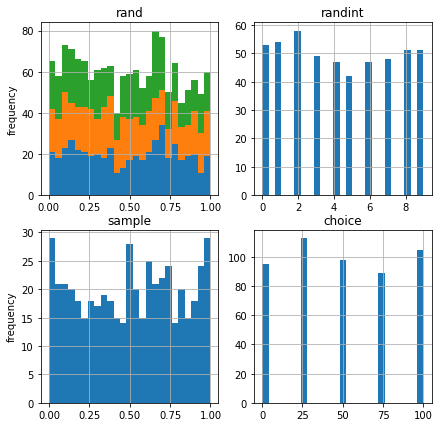

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
                                             figsize=(7, 7))
ax1.hist(rn1, bins=25, stacked=True)
ax1.set_title('rand')
ax1.set_ylabel('frequency')
ax1.grid(True)
ax2.hist(rn2, bins=25)
ax2.set_title('randint')
ax2.grid(True)
ax3.hist(rn3, bins=25)
ax3.set_title('sample')
ax3.set_ylabel('frequency')
ax3.grid(True)
ax4.hist(rn4, bins=25)
ax4.set_title('choice')
ax4.grid(True)

In [8]:
sample_size = 500
rn1 = npr.standard_normal(sample_size)
rn2 = npr.normal(100, 20, sample_size)
rn3 = npr.chisquare(df=0.5, size=sample_size)
rn4 = npr.poisson(lam=1.0, size=sample_size)

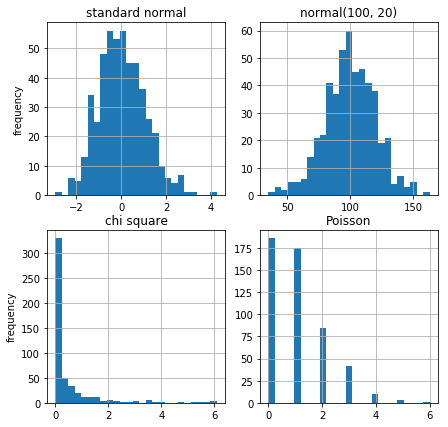

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
ax1.hist(rn1, bins=25)
ax1.set_title('standard normal')
ax1.set_ylabel('frequency')
ax1.grid(True)
ax2.hist(rn2, bins=25)
ax2.set_title('normal(100, 20)')
ax2.grid(True)
ax3.hist(rn3, bins=25)
ax3.set_title('chi square')
ax3.set_ylabel('frequency')
ax3.grid(True)
ax4.hist(rn4, bins=25)
ax4.set_title('Poisson')
ax4.grid(True)

In [10]:
S0 = 100  # initial value
r = 0.05  # constant short rate
sigma = 0.25  # constant volatility
T = 2.0  # in years
I = 10000  # number of random draws
ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T 
             + sigma * np.sqrt(T) * npr.standard_normal(I))

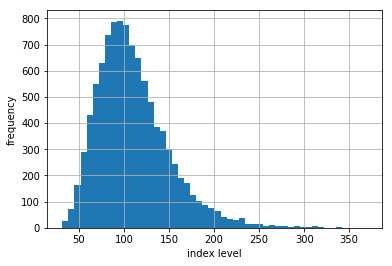

In [11]:
plt.hist(ST1, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)

In [12]:
ST2 = S0 * npr.lognormal((r - 0.5 * sigma ** 2) * T,
                        sigma * np.sqrt(T), size=I)

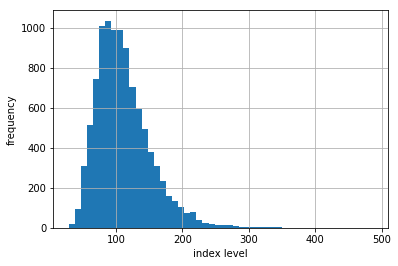

In [13]:
plt.hist(ST2, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)

In [14]:
import scipy.stats as scs

In [15]:
def print_statistics(a1, a2):
    ''' Prints selected statistics.
    
    Parameters
    ==========
    a1, a2 : ndarray objects
        results object from simulation
    '''
    sta1 = scs.describe(a1)
    sta2 = scs.describe(a2)
    print("%14s %14s %14s" % 
        ('statistic', 'data set 1', 'data set 2'))
    print(45 * "-")
    print("%14s %14.3f %14.3f" % ('size', sta1[0], sta2[0]))
    print("%14s %14.3f %14.3f" % ('min', sta1[1][0], sta2[1][0]))
    print("%14s %14.3f %14.3f" % ('max', sta1[1][1], sta2[1][1]))
    print("%14s %14.3f %14.3f" % ('mean', sta1[2], sta2[2]))
    print("%14s %14.3f %14.3f" % ('std', np.sqrt(sta1[3]), np.sqrt(sta2[3])))
    print("%14s %14.3f %14.3f" % ('skew', sta1[4], sta2[4]))
    print("%14s %14.3f %14.3f" % ('kurtosis', sta1[5], sta2[5]))

In [16]:
print_statistics(ST1, ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         31.508         28.765
           max        369.390        486.463
          mean        110.125        111.206
           std         40.128         40.824
          skew          1.157          1.221
      kurtosis          2.386          2.988


In [17]:
I = 10000
M = 50
dt = T / M
S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
            + sigma * np.sqrt(dt) * npr.standard_normal(I))

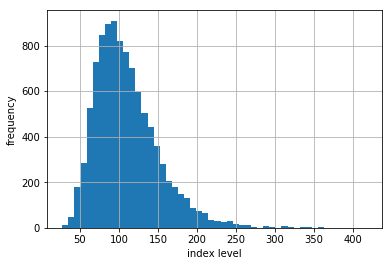

In [18]:
plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)

In [19]:
print_statistics(S[-1], ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         27.472         28.765
           max        417.261        486.463
          mean        110.093        111.206
           std         40.958         40.824
          skew          1.249          1.221
      kurtosis          2.920          2.988


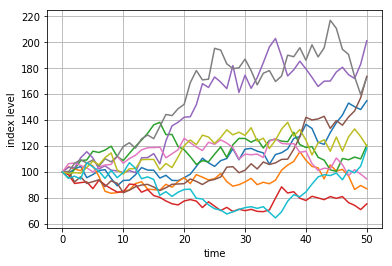

In [20]:
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)

In [21]:
x0 = 0.05
kappa = 3.0
theta = 0.02
sigma = 0.1

In [22]:
I = 10000
M = 50
dt = T / M
def srd_euler():
    xh = np.zeros((M + 1, I))
    x1 = np.zeros_like(xh)
    xh[0] = x0
    x1[0] = x0
    for t in range(1, M + 1):
        xh[t] = (xh[t - 1]
              + kappa * (theta - np.maximum(xh[t - 1], 0)) * dt
              + sigma * np.sqrt(np.maximum(xh[t - 1], 0)) * np.sqrt(dt)  
              * npr.standard_normal(I))
    x1 = np.maximum(xh, 0)
    return x1
x1 = srd_euler()

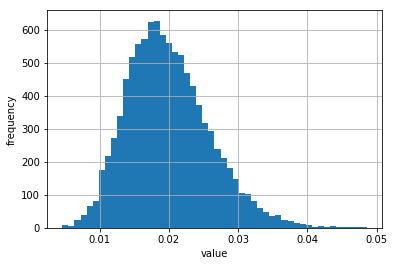

In [23]:
plt.hist(x1[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid(True)

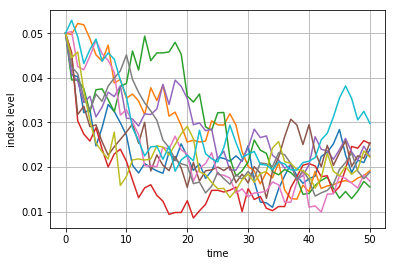

In [24]:
plt.plot(x1[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)

In [25]:
def srd_exact():
    x2 = np.zeros((M + 1, I))
    x2[0] = x0
    for t in range(1, M + 1):
        df = 4 * theta * kappa / sigma ** 2
        c = (sigma ** 2 * (1 - np.exp(-kappa * dt))) / (4 * kappa)
        nc = np.exp(-kappa * dt) / c * x2[t - 1] 
        x2[t] = c * npr.noncentral_chisquare(df, nc, size=I)
    return x2
x2 = srd_exact()

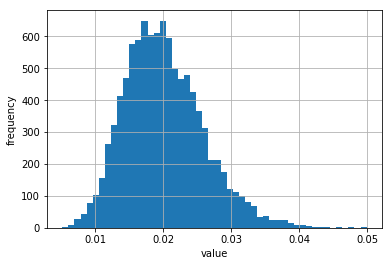

In [26]:
plt.hist(x2[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid(True)

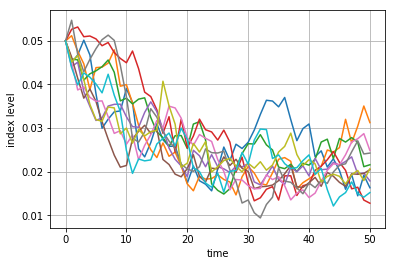

In [27]:
plt.plot(x2[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)

In [28]:
print_statistics(x1[-1], x2[-1])

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min          0.005          0.005
           max          0.049          0.050
          mean          0.020          0.020
           std          0.006          0.006
          skew          0.572          0.597
      kurtosis          0.451          0.550


In [29]:
I = 250000
%time x1 = srd_euler()

Wall time: 2.31 s


In [30]:
%time x2 = srd_exact()

Wall time: 2.72 s


In [31]:
print_statistics(x1[-1], x2[-1])
x1 = 0.0; x2 = 0.0

     statistic     data set 1     data set 2
---------------------------------------------
          size     250000.000     250000.000
           min          0.002          0.004
           max          0.063          0.061
          mean          0.020          0.020
           std          0.006          0.006
          skew          0.565          0.586
      kurtosis          0.518          0.528


In [32]:
S0 = 100.
r = 0.05
v0 = 0.1
kappa = 3.0
theta = 0.25
sigma = 0.1
rho = 0.6
T = 1.0

In [33]:
corr_mat = np.zeros((2, 2))
corr_mat[0, :] = [1.0, rho]
corr_mat[1, :] = [rho, 1.0]
cho_mat = np.linalg.cholesky(corr_mat)

In [34]:
M = 50
I = 10000
ran_num = npr.standard_normal((2, M + 1, I))

In [35]:
dt = T / M
v = np.zeros_like(ran_num[0])
vh = np.zeros_like(v)
v[0] = v0
vh[0] = v0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    vh[t] = (vh[t - 1] + kappa * (theta - np.maximum(vh[t - 1], 0)) * dt
          + sigma * np.sqrt(np.maximum(vh[t - 1], 0)) * np.sqrt(dt)  
          * ran[1])
v = np.maximum(vh, 0)

In [36]:
S = np.zeros_like(ran_num[0])
S[0] = S0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    S[t] = S[t - 1] * np.exp((r - 0.5 * v[t]) * dt +
                    np.sqrt(v[t]) * ran[0] * np.sqrt(dt))

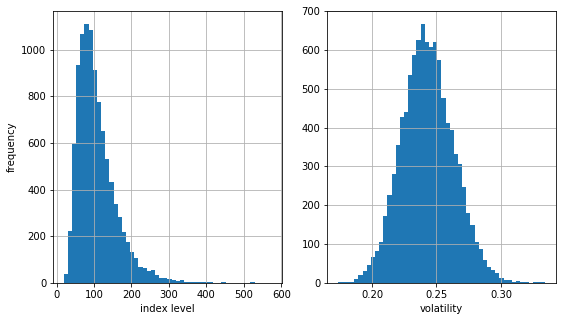

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
ax1.hist(S[-1], bins=50)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.grid(True)
ax2.hist(v[-1], bins=50)
ax2.set_xlabel('volatility')
ax2.grid(True)

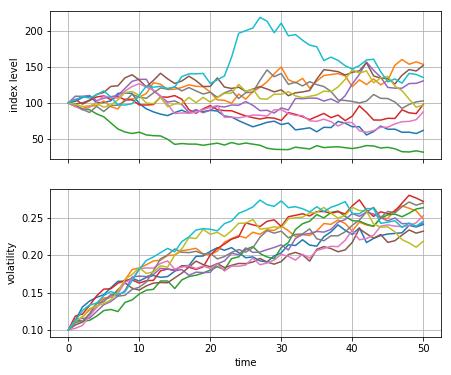

In [38]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7, 6))
ax1.plot(S[:, :10], lw=1.5)
ax1.set_ylabel('index level')
ax1.grid(True)
ax2.plot(v[:, :10], lw=1.5)
ax2.set_xlabel('time')
ax2.set_ylabel('volatility')
ax2.grid(True)

In [39]:
S0 = 100.
r = 0.05
sigma = 0.2
lamb = 0.75
mu = -0.6
delta = 0.25
T = 1.0

In [40]:
M = 50
I = 10000
dt = T / M
rj = lamb * (np.exp(mu + 0.5 * delta ** 2) - 1)
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I))
sn2 = npr.standard_normal((M + 1, I))
poi = npr.poisson(lamb * dt, (M + 1, I))
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt
                       + sigma * np.sqrt(dt) * sn1[t])
                       + (np.exp(mu + delta * sn2[t]) - 1)
                       * poi[t])
    S[t] = np.maximum(S[t], 0)

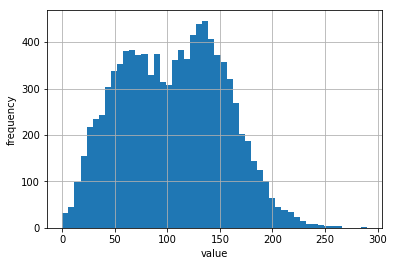

In [41]:
plt.hist(S[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid(True)

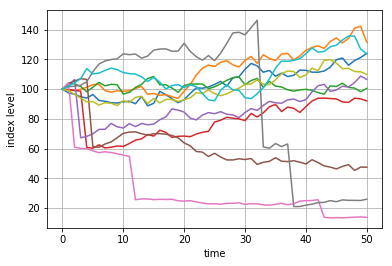

In [42]:
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)

In [43]:
print("%15s %15s" % ('Mean', 'Std. Deviation'))
print(31 * "-")
for i in range(1, 31, 2):
    npr.seed(1000)
    sn = npr.standard_normal(i ** 2 * 10000)
    print("%15.12f %15.12f" % (sn.mean(), sn.std()))

           Mean  Std. Deviation
-------------------------------
-0.011870394558  1.008752430725
-0.002815667298  1.002729536352
-0.003847776704  1.000594044165
-0.003058113374  1.001086345326
-0.001685126538  1.001630849589
-0.001175212007  1.001347684642
-0.000803969036  1.000159081432
-0.000601970954  0.999506522127
-0.000147787693  0.999571756099
-0.000313035581  0.999646153704
-0.000178447061  0.999677277878
 0.000096501709  0.999684346792
-0.000135677013  0.999823841902
-0.000015726986  0.999906493379
-0.000039368519  1.000063091949


In [44]:
sn = npr.standard_normal(int(10000 / 2))
sn = np.concatenate((sn, -sn))
np.shape(sn)

(10000,)

In [45]:
print("%15s %15s" % ('Mean', 'Std. Deviation'))
print(31 * "-")
for i in range(1, 31, 2):
    npr.seed(1000)
    sn = npr.standard_normal(i ** 2 * int(10000 / 2))
    sn = np.concatenate((sn, -sn))
    print("%15.12f %15.12f" % (sn.mean(), sn.std()))

           Mean  Std. Deviation
-------------------------------
 0.000000000000  1.009653753942
-0.000000000000  1.000413716783
 0.000000000000  1.002925061201
-0.000000000000  1.000755212673
 0.000000000000  1.001636910076
-0.000000000000  1.000726758438
-0.000000000000  1.001621265149
 0.000000000000  1.001203722778
-0.000000000000  1.000556669784
 0.000000000000  1.000113464185
-0.000000000000  0.999435175324
 0.000000000000  0.999356961431
-0.000000000000  0.999641436845
-0.000000000000  0.999642768905
-0.000000000000  0.999638303451


In [48]:
def gen_sn(M, I, anti_paths=True, mo_match=True):
    ''' Function to generate random numbers for simulation.
    
    Parameters
    ==========
    M : int
        number of time intervals for discretization
    I : int
        number of paths to be simulated
    anti_paths: boolean
        use of antithetic variates
    mo_math : boolean
        use of moment matching
    '''
    if anti_paths is True:
        sn = npr.standard_normal((M + 1, int(I / 2)))
        sn = np.concatenate((sn, -sn), axis=1)
    else:
        sn = npr.standard_normal((M + 1, I))
    if mo_match is True:
        sn = (sn - sn.mean()) / sn.std()
    return sn

In [49]:
S0 = 100.
r = 0.05
sigma = 0.25
T = 1.0
I = 50000
def gbm_mcs_stat(K):
    ''' Valuation of European call option in Black-Scholes-Merton
    by Monte Carlo simulation (of index level at maturity)
    
    Parameters
    ==========
    K : float
        (positive) strike price of the option
    
    Returns
    =======
    C0 : float
        estimated present value of European call option
    '''
    sn = gen_sn(1, I)
    # simulate index level at maturity
    ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T 
                 + sigma * np.sqrt(T) * sn[1])
    # calculate payoff at maturity
    hT = np.maximum(ST - K, 0)
    # calculate MCS estimator
    C0 = np.exp(-r * T) * 1 / I * np.sum(hT)
    return C0

In [50]:
gbm_mcs_stat(K=105.)

9.9909344080444633

In [51]:
M = 50
def gbm_mcs_dyna(K, option='call'):
    ''' Valuation of European options in Black-Scholes-Merton
    by Monte Carlo simulation (of index level paths)
    
    Parameters
    ==========
    K : float
        (positive) strike price of the option
    option : string
        type of the option to be valued ('call', 'put')
    
    Returns
    =======
    C0 : float
        estimated present value of European call option
    '''
    dt = T / M
    # simulation of index level paths
    S = np.zeros((M + 1, I))
    S[0] = S0
    sn = gen_sn(M, I)
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
                + sigma * np.sqrt(dt) * sn[t])
    # case-based calculation of payoff
    if option == 'call':
        hT = np.maximum(S[-1] - K, 0)
    else:
        hT = np.maximum(K - S[-1], 0)
    # calculation of MCS estimator
    C0 = np.exp(-r * T) * 1 / I * np.sum(hT)
    return C0

In [52]:
gbm_mcs_dyna(K=110., option='call')

7.9362966755105022

In [53]:
gbm_mcs_dyna(K=110., option='put')

12.629499355641862

In [55]:
from bsm_functions import bsm_call_value
stat_res = []
dyna_res = []
anal_res = []
k_list = np.arange(80., 120.1, 5.)
np.random.seed(200000)
for K in k_list:
    stat_res.append(gbm_mcs_stat(K))
    dyna_res.append(gbm_mcs_dyna(K))
    anal_res.append(bsm_call_value(S0, K, T, r, sigma))
stat_res = np.array(stat_res)
dyna_res = np.array(dyna_res)
anal_res = np.array(anal_res)

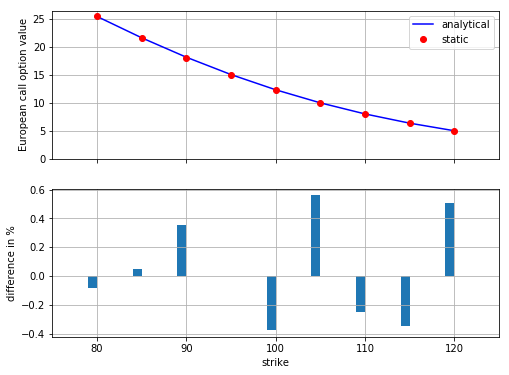

In [56]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
ax1.plot(k_list, anal_res, 'b', label='analytical')
ax1.plot(k_list, stat_res, 'ro', label='static')
ax1.set_ylabel('European call option value')
ax1.grid(True)
ax1.legend(loc=0)
ax1.set_ylim(ymin=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (anal_res - stat_res) / anal_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('difference in %')
ax2.set_xlim(left=75, right=125)
ax2.grid(True)

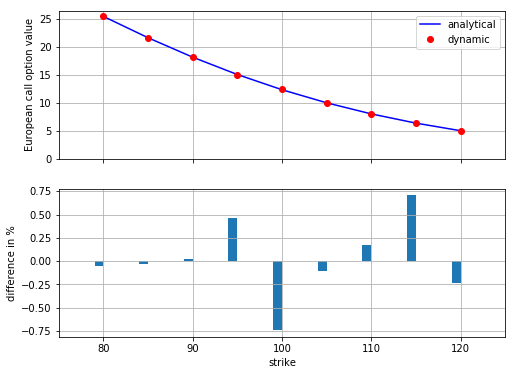

In [57]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
ax1.plot(k_list, anal_res, 'b', label='analytical')
ax1.plot(k_list, dyna_res, 'ro', label='dynamic')
ax1.set_ylabel('European call option value')
ax1.grid(True)
ax1.legend(loc=0)
ax1.set_ylim(ymin=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (anal_res - dyna_res) / anal_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('difference in %')
ax2.set_xlim(left=75, right=125)
ax2.grid(True)

In [58]:
def gbm_mcs_amer(K, option='call'):
    ''' Valuation of American option in Black-Scholes-Merton
    by Monte Carlo simulation by LSM algorithm
    
    Parameters
    ==========
    K : float
        (positive) strike price of the option
    option : string
        type of the option to be valued ('call', 'put')
    
    Returns
    =======
    C0 : float
        estimated present value of European call option
    '''
    dt = T / M
    df = np.exp(-r * dt)
    # simulation of index levels
    S = np.zeros((M + 1, I))
    S[0] = S0
    sn = gen_sn(M, I)
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
                + sigma * np.sqrt(dt) * sn[t])
    # case based calculation of payoff
    if option == 'call':
        h = np.maximum(S - K, 0)
    else:
        h = np.maximum(K - S, 0)
    # LSM algorithm
    V = np.copy(h)
    for t in range(M - 1, 0, -1):
        reg = np.polyfit(S[t], V[t + 1] * df, 7)
        C = np.polyval(reg, S[t])
        V[t] = np.where(C > h[t], V[t + 1] * df, h[t])
    # MCS estimator
    C0 = df * 1 / I * np.sum(V[1])
    return C0

In [59]:
gbm_mcs_amer(110., option='call')

7.7789332794493156

In [60]:
gbm_mcs_amer(110., option='put')

13.614023206242445

In [61]:
euro_res = []
amer_res = []
k_list = np.arange(80., 120.1, 5.)
for K in k_list:
    euro_res.append(gbm_mcs_dyna(K, 'put'))
    amer_res.append(gbm_mcs_amer(K, 'put'))
euro_res = np.array(euro_res)
amer_res = np.array(amer_res)

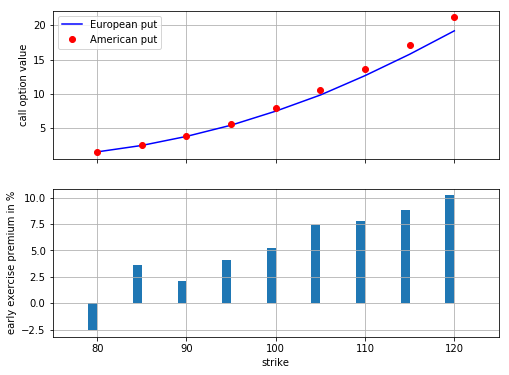

In [62]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
ax1.plot(k_list, euro_res, 'b', label='European put')
ax1.plot(k_list, amer_res, 'ro', label='American put')
ax1.set_ylabel('call option value')
ax1.grid(True)
ax1.legend(loc=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (amer_res - euro_res) / euro_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('early exercise premium in %')
ax2.set_xlim(left=75, right=125)
ax2.grid(True)
# tag: opt_euro_amer
# title: Comparsion of European and LSM Monte Carlo estimator values
# size: 60

In [63]:
S0 = 100
r = 0.05
sigma = 0.25
T = 30 / 365.
I = 10000
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T 
             + sigma * np.sqrt(T) * npr.standard_normal(I))

In [64]:
R_gbm = np.sort(ST - S0)

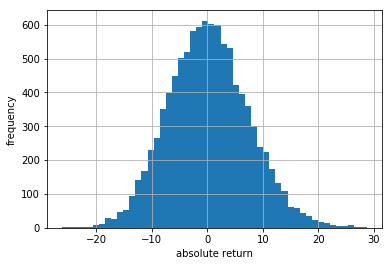

In [65]:
plt.hist(R_gbm, bins=50)
plt.xlabel('absolute return')
plt.ylabel('frequency')
plt.grid(True)
# tag: var_hist_gbm
# title: Absolute returns of geometric Brownian motion (30d)
# size: 60

In [66]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_gbm, percs)
print("%16s %16s" % ('Confidence Level', 'Value-at-Risk'))
print(33 * "-")
for pair in zip(percs, var):
    print("%16.2f %16.3f" % (100 - pair[0], -pair[1]))

Confidence Level    Value-at-Risk
---------------------------------
           99.99           26.072
           99.90           20.175
           99.00           15.753
           97.50           13.265
           95.00           11.298
           90.00            8.942


In [67]:
dt = 30. / 365 / M
rj = lamb * (np.exp(mu + 0.5 * delta ** 2) - 1)
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I))
sn2 = npr.standard_normal((M + 1, I))
poi = npr.poisson(lamb * dt, (M + 1, I))
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt
                       + sigma * np.sqrt(dt) * sn1[t])
                       + (np.exp(mu + delta * sn2[t]) - 1)
                       * poi[t])
    S[t] = np.maximum(S[t], 0)

In [68]:
R_jd = np.sort(S[-1] - S0)

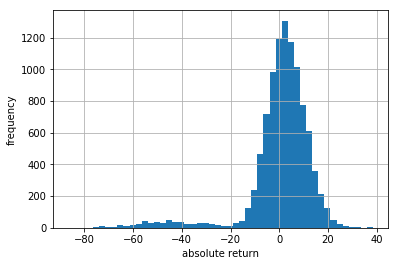

In [69]:
plt.hist(R_jd, bins=50)
plt.xlabel('absolute return')
plt.ylabel('frequency')
plt.grid(True)
# tag: var_hist_jd
# title: Absolute returns of jump diffusion (30d)
# size: 60

In [70]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_jd, percs)
print("%16s %16s" % ('Confidence Level', 'Value-at-Risk'))
print(33 * "-")
for pair in zip(percs, var):
    print("%16.2f %16.3f" % (100 - pair[0], -pair[1]))

Confidence Level    Value-at-Risk
---------------------------------
           99.99           75.029
           99.90           71.833
           99.00           55.901
           97.50           45.697
           95.00           25.993
           90.00            8.773


In [71]:
percs = list(np.arange(0.0, 10.1, 0.1))
gbm_var = scs.scoreatpercentile(R_gbm, percs)
jd_var = scs.scoreatpercentile(R_jd, percs)

(-90.277619106623035, 0.0)

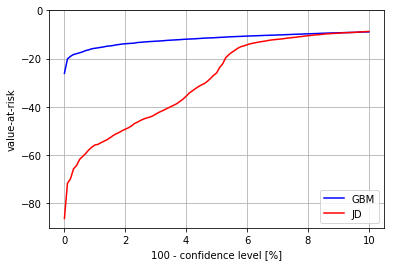

In [72]:
plt.plot(percs, gbm_var, 'b', lw=1.5, label='GBM')
plt.plot(percs, jd_var, 'r', lw=1.5, label='JD')
plt.legend(loc=4)
plt.xlabel('100 - confidence level [%]')
plt.ylabel('value-at-risk')
plt.grid(True)
plt.ylim(ymax=0.0)
# tag: var_comp
# title: Value-at-risk for geometric Brownian motion and jump diffusion
# size: 60

In [73]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.
I = 100000
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T 
             + sigma * np.sqrt(T) * npr.standard_normal(I))

In [74]:
L = 0.5

In [75]:
p = 0.01

In [76]:
D = npr.poisson(p * T, I)
D = np.where(D > 1, 1, D)

In [77]:
np.exp(-r * T) * 1 / I * np.sum(ST)

99.981825216842921

In [78]:
CVaR = np.exp(-r * T) * 1 / I * np.sum(L * D * ST)
CVaR

0.5152011134161355

In [79]:
S0_CVA = np.exp(-r * T) * 1 / I * np.sum((1 - L * D) * ST)
S0_CVA

99.466624103426781

In [80]:
S0_adj = S0 - CVaR
S0_adj

99.48479888658386

(0.0, 175)

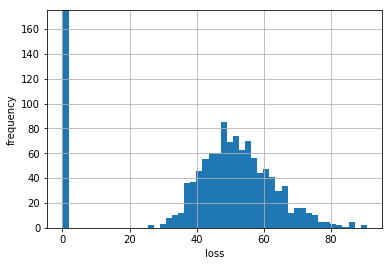

In [81]:
plt.hist(L * D * ST, bins=50)
plt.xlabel('loss')
plt.ylabel('frequency')
plt.grid(True)
plt.ylim(ymax=175)
# tag: cva_hist_stock
# title: Losses due to risk-neutrally expected default (stock)
# size: 60

In [82]:
K = 100.
hT = np.maximum(ST - K, 0)
C0 = np.exp(-r * T) * 1 / I * np.sum(hT)
C0

10.427336109660052

In [83]:
CVaR = np.exp(-r * T) * 1 / I * np.sum(L * D * hT)
CVaR

0.053822578452208093

In [84]:
C0_CVA = np.exp(-r * T) * 1 / I * np.sum((1 - L * D) * hT)
C0_CVA

10.373513531207843

(0.0, 350)

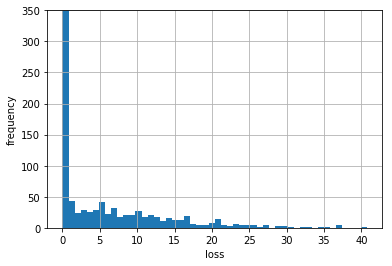

In [85]:
plt.hist(L * D * hT, bins=50)
plt.xlabel('loss')
plt.ylabel('frequency')
plt.grid(True)
plt.ylim(ymax=350)